In [7]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

In [5]:
df = pd.read_csv('../processed_data/merged_data_2013-2022.csv')
df = df.drop(columns=["Unnamed: 0"])

In [ ]:
# basic exploration
print(f"Dataset shape: {df.shape}")
print(f"Counties: {df['county'].nunique()}")
print(f"Years: {df['year'].unique()}")
print(f"\nMissing values: {df.isnull().sum()}")
#print(df.describe())

In [23]:
# which counties have the highest median aqi?
worst_aqi = df.groupby('county')['median_aqi'].mean().sort_values(ascending=False).head(10)
print("Counties with highest median AQI:")
print(worst_aqi)

# which counties have highest asthma rates?
highest_asthma = df.groupby('county')['asthma_rate'].mean().sort_values(ascending=False).head(10)
print("Counties with highest astham rates:")
print(highest_asthma)

Counties with highest median AQI:
county
Riverside         85.6
San Bernardino    84.5
Kern              83.6
Tulare            79.0
Los Angeles       78.5
Fresno            75.5
Kings             69.7
San Diego         67.0
Imperial          62.4
Madera            61.5
Name: median_aqi, dtype: float64
Counties with highest astham rates:
county
Lake           70.638
Solano         69.643
Merced         64.923
Fresno         61.310
Kings          58.172
Sacramento     56.436
San Joaquin    55.737
Imperial       54.972
Mendocino      54.430
Humboldt       53.759
Name: asthma_rate, dtype: float64


In [ ]:
# correlation analysis (pearson's correlation)
correlation = df['median_aqi'].corr(df['asthma_rate'])
print(f"Correlation between AQI and Asthma rates: {correlation:.3f}")

# linear regression 
slope, intercept, r_value, p_value, std_err = stats.linregress(df['median_aqi'], df['asthma_rate'])
print(f"R-squared: {r_value**2:.3f}, P-value: {p_value:.3f}")

simple visualizations of the relationship between aqi and asthma rates:

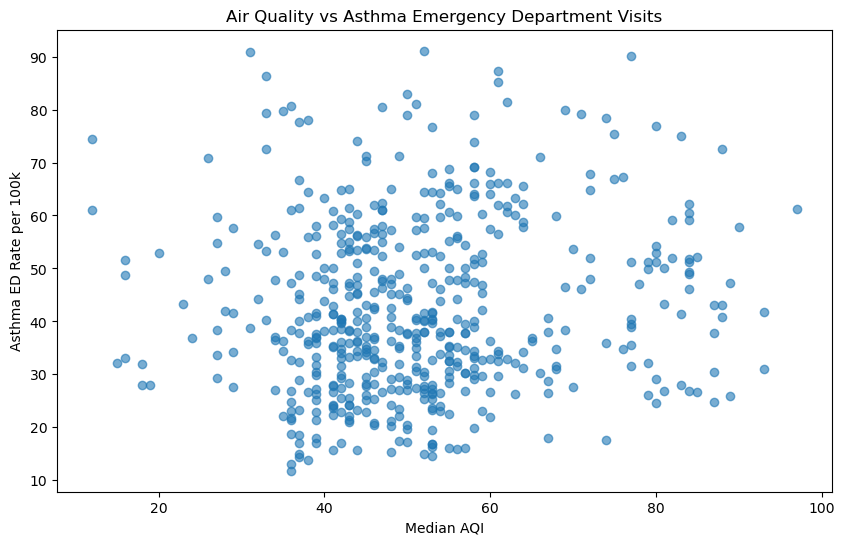

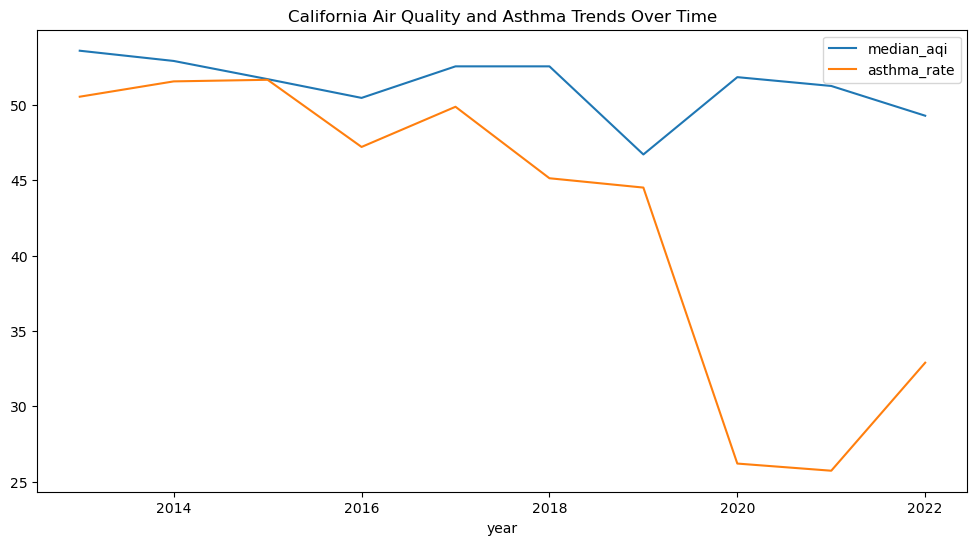

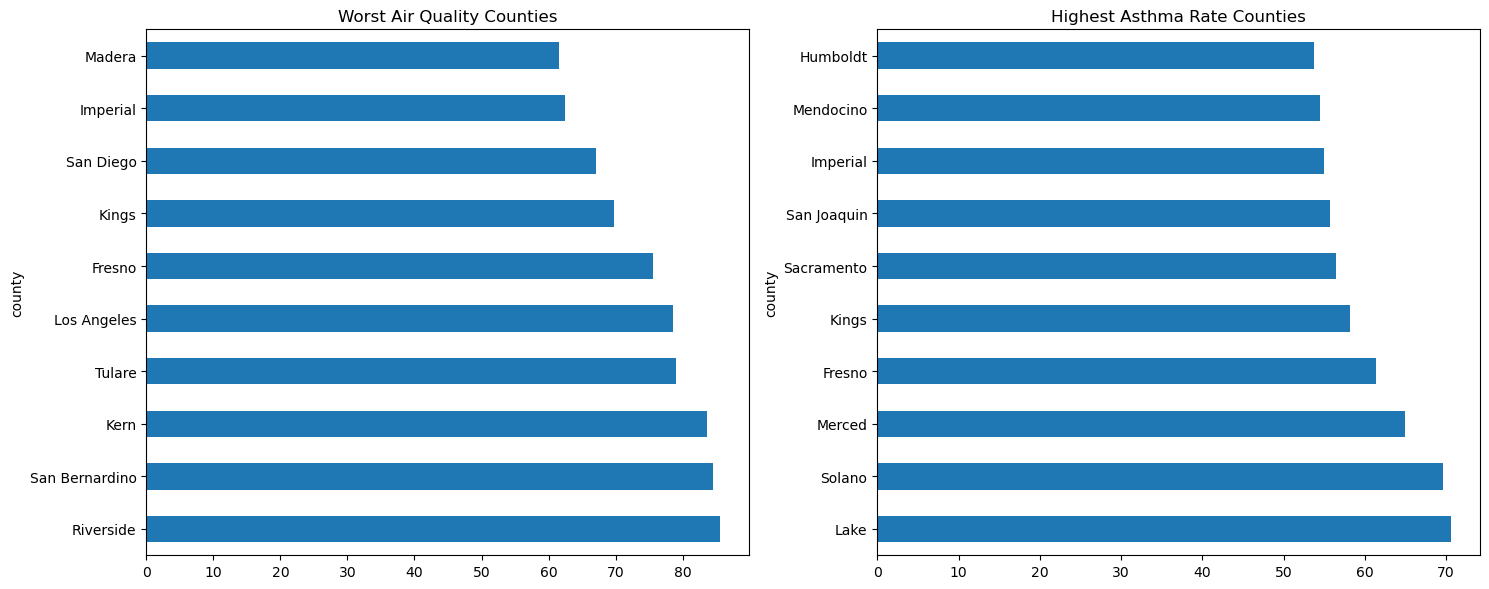

In [24]:
#  median aqi vs asthma rate - scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['median_aqi'], df['asthma_rate'], alpha=0.6)
plt.xlabel('Median AQI')
plt.ylabel('Asthma ED Rate per 100k')
plt.title('Air Quality vs Asthma Emergency Department Visits')
plt.show()

# time trends analysis - line plot
yearly_trends = df.groupby('year')[['median_aqi', 'asthma_rate']].mean()
yearly_trends.plot(kind='line', figsize=(12, 6))
plt.title('California Air Quality and Asthma Trends Over Time')
plt.show()

looking at more factors in the relationship (aqi & asthma):

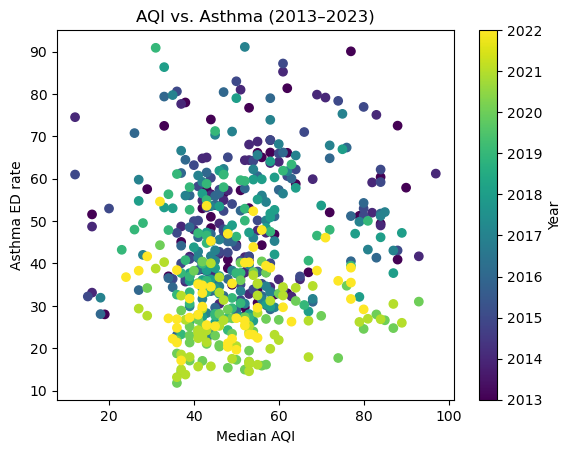

In [25]:
# top counties with worst aqi and highest asthma rates - bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
worst_aqi.head(10).plot(kind='barh', ax=ax1, title='Worst Air Quality Counties')
highest_asthma.head(10).plot(kind='barh', ax=ax2, title='Highest Asthma Rate Counties')
plt.tight_layout()
plt.show()

# median aqi vs asthma rate colored by year - scatter plot
plt.scatter(df['median_aqi'], df['asthma_rate'], c=df['year'])
plt.xlabel('Median AQI')
plt.ylabel('Asthma ED rate')
plt.title('AQI vs. Asthma (2013–2023)')
plt.colorbar(label='Year')
plt.show()

using models to explore further on the complex relationship:

In [ ]:
# simple OLS regression model
# note: this fit does not account for the whole strength of the relationship
model = smf.ols("asthma_rate ~ median_aqi", data=df).fit()
print(model.summary())

In [6]:
# multiple OLS regression model
# note: more complex model but gave much more stronger relationship between aqi and asthma rate

# "aqi vs asthma rate by county and year"
mod = smf.ols('asthma_rate ~ median_aqi + C(county) + C(year)', data=df).fit()
print(mod.summary())

# extracting the observed, predicted, and residuals
y = df['asthma_rate']
y_pred  = mod.fittedvalues
residuals = mod.resid

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            asthma_rate   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     52.90
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          6.40e-174
Time:                        22:23:56   Log-Likelihood:                -1677.4
No. Observations:                 529   AIC:                             3481.
Df Residuals:                     466   BIC:                             3750.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       45.8562      3.917     11.706      0.000      38.159      53.554
C(county)[T.Amador]              5.4041      2.882      1.875      0.061      -0.259      11.068
C(county)[T.Butte]             -11.2520      2.751     -4.090      0.000     -16.657      -5.847
C(county)[T.Calaveras]          -0.9634      2.760     -0.349      0.727      -6.387       4.460
C(county)[T.Colusa]            -10.1819      2.770     -3.676      0.000     -15.625      -4.739
C(county)[T.Contra Costa]        3.4170      2.753      1.241      0.215      -1.992       8.826
C(county)[T.Del Norte]           6.9385      3.170      2.189      0.029       0.710      13.167
C(county)[T.El Dorado]         -14.9365      2.799     -5.336      0.000     -20.437      -9.436
C(county)[T.Fresno]              7.7885      3.055      2.549      0.011       1.785      13.792
C(county)[T.Glenn]             -10.6532      2.795     -3.812      0.000     -16.145      -5.161
C(county)[T.Humboldt]            8.2659      2.937      2.814      0.005       2.495      14.037
C(county)[T.Imperial]            4.0930      2.803      1.460      0.145      -1.415       9.601
C(county)[T.Inyo]                1.7316      2.750      0.630      0.529      -3.673       7.136
C(county)[T.Kern]               -8.7124      3.295     -2.644      0.008     -15.188      -2.237
C(county)[T.Kings]               5.8205      2.920      1.993      0.047       0.082      11.559
C(county)[T.Lake]               25.5887      2.986      8.570      0.000      19.721      31.456
C(county)[T.Los Angeles]       -10.0336      3.138     -3.198      0.001     -16.199      -3.868
C(county)[T.Madera]             -0.3764      2.793     -0.135      0.893      -5.864       5.111
C(county)[T.Marin]             -25.4448      2.827     -8.999      0.000     -31.001     -19.889
C(county)[T.Mariposa]          -12.1979      2.751     -4.434      0.000     -17.604      -6.792
C(county)[T.Mendocino]           7.5652      2.819      2.683      0.008       2.025      13.105
C(county)[T.Merced]             15.0526      2.759      5.455      0.000       9.630      20.475
C(county)[T.Mono]               -7.4101      3.212     -2.307      0.022     -13.722      -1.098
C(county)[T.Monterey]           -8.2250      2.851     -2.884      0.004     -13.828      -2.622
C(county)[T.Napa]              -13.6074      2.851     -4.773      0.000     -19.210      -8.005
C(county)[T.Nevada]            -16.3990      2.769     -5.922      0.000     -21.840     -10.958
C(county)[T.Orange]            -23.1699      2.758     -8.402      0.000     -28.589     -17.751
C(county)[T.Placer]            -21.0056      2.748     -7.645      0.000     -26.405     -15.606
C(county)[T.Plumas]              0.2246      2.750      0.082      0.935    

visualizations of the regression results:

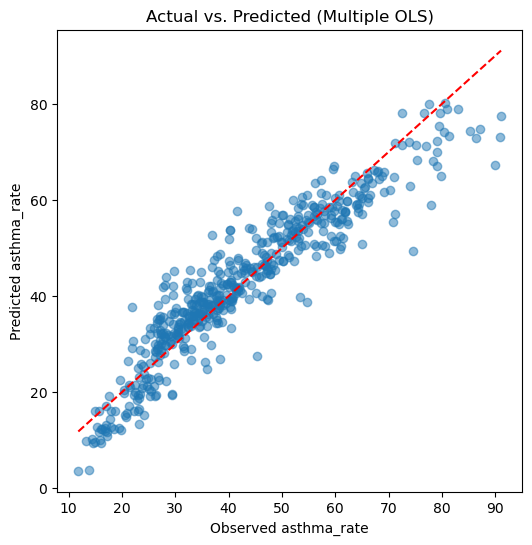

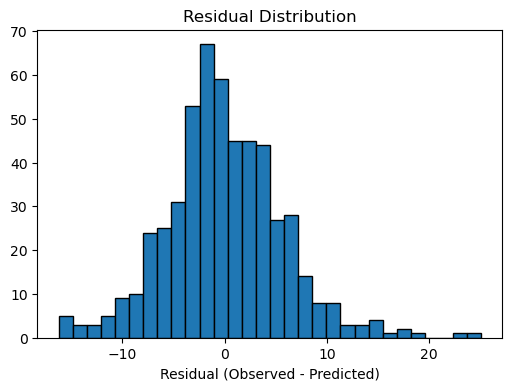

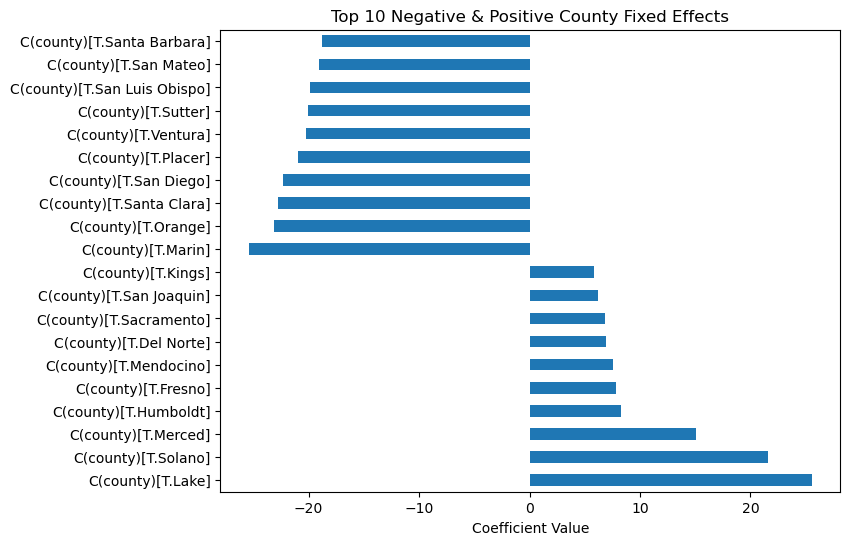

In [27]:
# actual vs predicted scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Observed asthma_rate')
plt.ylabel('Predicted asthma_rate')
plt.title('Actual vs. Predicted (Multiple OLS)')
plt.show()

# residuals distribution histogram
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual (Observed - Predicted)')
plt.title('Residual Distribution')
plt.show()

# top county fixed effects
coefs = mod.params.filter(like='C(county)')
top_pos = coefs.sort_values(ascending=False).head(10) # plot top 10 positive
top_neg = coefs.sort_values().head(10) # plot top 10 negative
plot_coefs = pd.concat([top_pos, top_neg])

plt.figure(figsize=(8,6))
plot_coefs.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Negative & Positive County Fixed Effects')
plt.show()